<a href="https://colab.research.google.com/github/ajankowski/python_tiny_workshop/blob/master/jak_wyglada_dzwiek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.technologynetworks.com/tn/images/thumbs/jpeg/640_360/how-the-brain-separates-voice-and-sound-321859.jpg">

           
                 https://musicinformationretrieval.com/ipython_audio.html

# Importujemy biblioteki / Import libraries

In [ ]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
from IPython.display import Image
import numpy as np

### Sciagamy plik audio/ Audio file download

In [ ]:
!wget "https://ccrma.stanford.edu/workshops/mir2014/audio/CongaGroove-mono.wav"
x, sr = librosa.load('CongaGroove-mono.wav')

--2020-08-28 13:14:10--  https://ccrma.stanford.edu/workshops/mir2014/audio/CongaGroove-mono.wav
Resolving ccrma.stanford.edu (ccrma.stanford.edu)... 171.64.197.141
Connecting to ccrma.stanford.edu (ccrma.stanford.edu)|171.64.197.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384894 (376K) [audio/x-wav]
Saving to: ‘CongaGroove-mono.wav’

CongaGroove-mono.wa 100%[===================>] 375.87K   254KB/s    in 1.5s    

2020-08-28 13:14:13 (254 KB/s) - ‘CongaGroove-mono.wav’ saved [384894/384894]



In [ ]:
Audio('CongaGroove-mono.wav')

# Jak wygląda dźwięk?

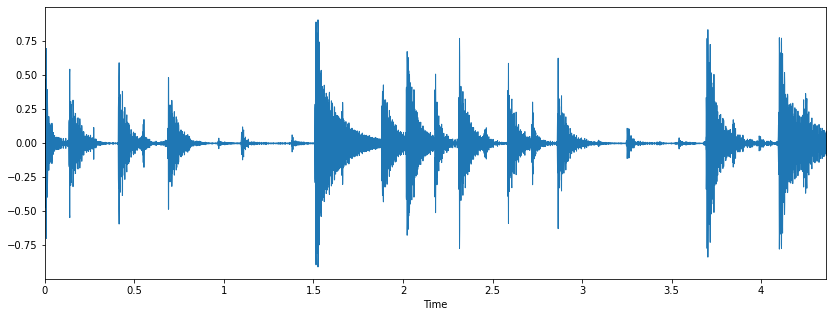

In [ ]:
dzwiek, sample_rate = librosa.load('CongaGroove-mono.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(dzwiek, sr=sample_rate)

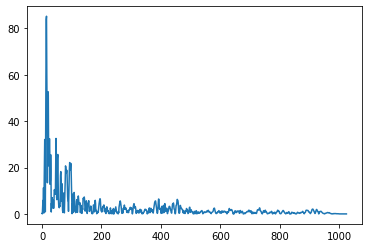

In [ ]:
sound, _ = librosa.effects.trim(dzwiek)
n_fft = 2048
D = np.abs(librosa.stft(sound[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

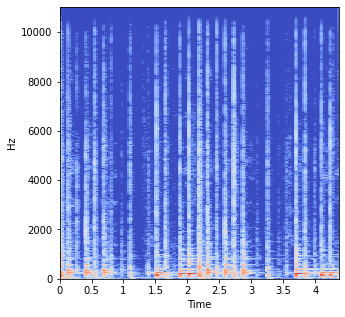

In [ ]:
X = librosa.stft(dzwiek)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(5, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

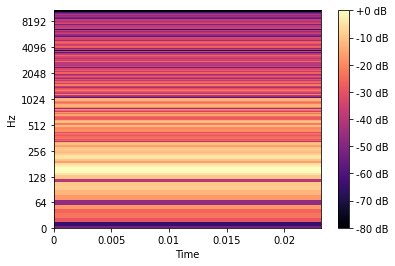

In [ ]:
hop_length = 512

DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');


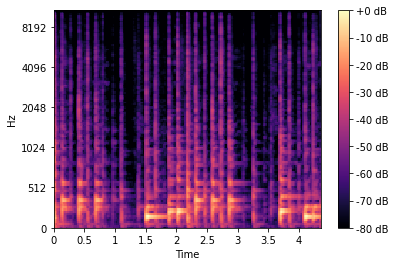

In [ ]:
# mel spectrogram

n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

S = librosa.feature.melspectrogram(sound, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

### Syntetyczny dźwięk

**Audio** can also accept a NumPy array. Let's synthesize a pure tone at 440 Hz

In [ ]:
import numpy
sample_rate = 22050
czas_trwania = 2.0    # seconds
t = numpy.linspace(0, czas_trwania, int(czas_trwania*sample_rate), endpoint=False) # time variable
nasz_dzwiek = 0.5*numpy.sin(2*numpy.pi*440*t)  # sinusoida

In [ ]:
Audio(nasz_dzwiek, rate=sample_rate)


# Zestaw danych - cyfry



In [ ]:
!git clone https://github.com/Jakobovski/free-spoken-digit-dataset.git

Cloning into 'free-spoken-digit-dataset'...
remote: Enumerating objects: 506, done.
remote: Counting objects: 100% (506/506), done.
remote: Compressing objects: 100% (506/506), done.
remote: Total 4178 (delta 0), reused 501 (delta 0), pack-reused 3672
Receiving objects: 100% (4178/4178), 30.44 MiB | 9.14 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [ ]:
!mv /content/free-spoken-digit-dataset/recordings /cyfry

In [ ]:
!rm -r /content/free-spoken-digit-dataset/

In [ ]:
x, sr = librosa.load('/cyfry/0_jackson_0.wav')

In [ ]:
Audio('/cyfry/0_jackson_0.wav')

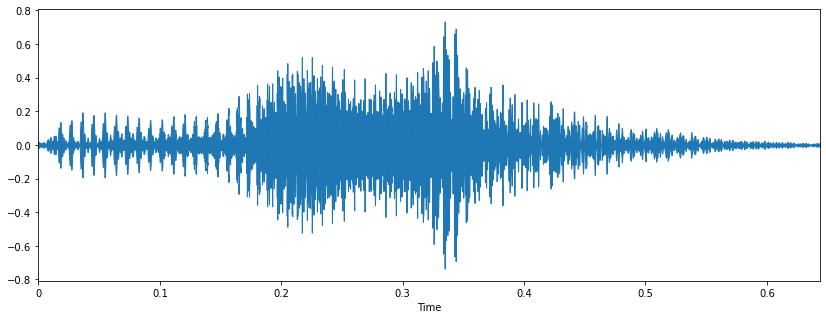

In [ ]:
dzwiek, sample_rate = librosa.load('/cyfry/0_jackson_0.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(dzwiek, sr=sample_rate)

In [ ]:
print(dzwiek)

[-0.01095867 -0.01327632 -0.01378769 ...  0.00736098  0.00378776
  0.        ]


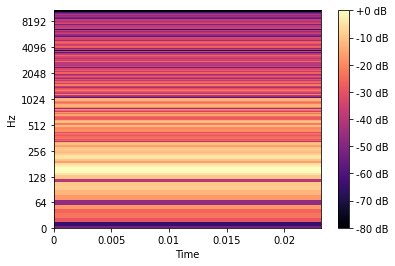

In [ ]:
hop_length = 512

DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

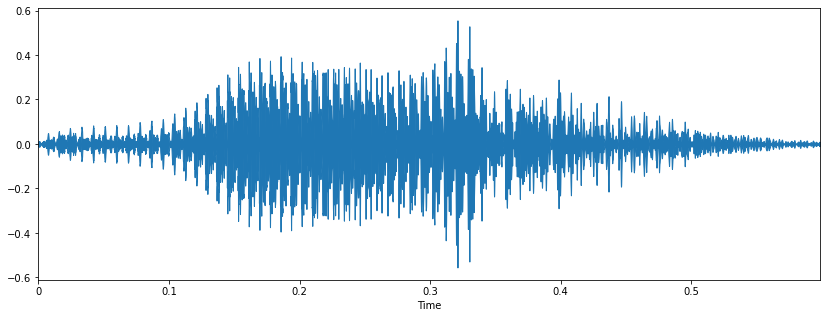

In [ ]:
dzwiek, sample_rate = librosa.load('/cyfry/0_jackson_3.wav')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(dzwiek, sr=sample_rate)

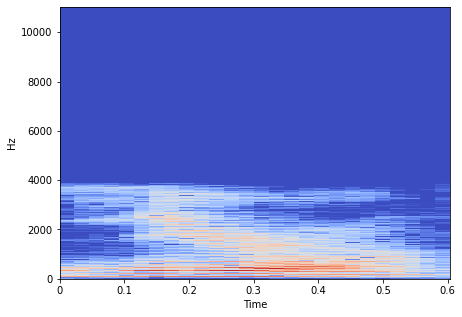

In [ ]:
X = librosa.stft(dzwiek)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

# Fourier Transform



The Fourier Transform (Wikipedia) is one of the most fundamental operations in applied mathematics and signal processing.

It transforms our time-domain signal into the frequency domain. Whereas the time domain expresses our signal as a sequence of samples, the frequency domain expresses our signal as a superposition of sinusoids of varying magnitudes, frequencies, and phase offsets.

To compute a Fourier transform in NumPy or SciPy, use **scipy.fft**:


In [ ]:
import scipy

X = scipy.fft(dzwiek)
X_mag = numpy.absolute(X)
f = numpy.linspace(0, sample_rate, len(X_mag)) # frequency variable

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Frequency (Hz)')

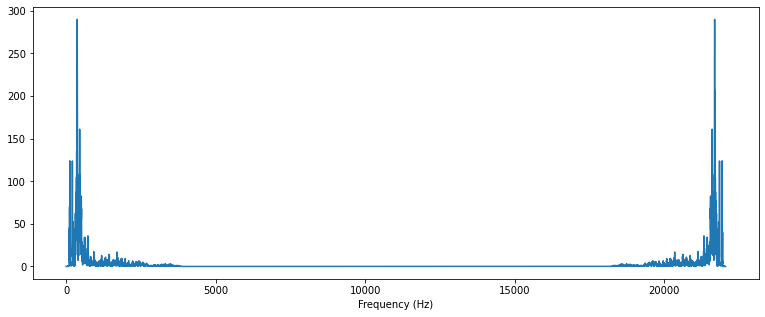

In [ ]:
# plot the spectrum

plt.figure(figsize=(13, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')


Text(0.5, 0, 'Frequency (Hz)')

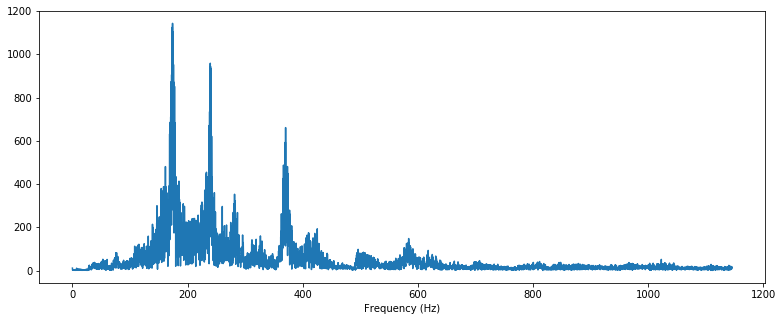

In [ ]:
# zoom in

plt.figure(figsize=(13, 5))
plt.plot(f[:5000], X_mag[:5000])
plt.xlabel('Frequency (Hz)')